In [7]:
!pip install fastf1


import fastf1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path



# Load the race session for the 2019 German Grand Prix, Race ('R' session)
session = fastf1.get_session(2019, 'German Grand Prix', 'R')
session.load()

# Get the list of available drivers
available_drivers = session.drivers
print("Available drivers:", available_drivers)

# Iterate over all drivers to find available telemetry
for driver_code in available_drivers:
    try:
        # Get laps for the driver
        driver_laps = session.laps.pick_driver(driver_code)

        # Check if there are any laps available for this driver
        if driver_laps.empty:
            print(f"No laps available for driver {driver_code}")
            continue

        # Extract telemetry for the fastest lap of this driver
        selected_laps = driver_laps.pick_laps(1)
        #selected_laps = driver_laps#.pick_fastest() **************************** ROUVIN HERE SELECT THE LAP(S) YOU WANT
        # OR selected_laps = driver_laps.pick_laps(range(10,21))
        # OR selected_laps = driver_laps.pick_laps(1)

        # Get telemetry data at the highest available resolution (100 frequency) and the original one
        telemetry = selected_laps.get_telemetry(frequency=100)  # Use 'original' for highest granularity
        telemetry_original= selected_laps.get_telemetry(frequency='original')  # Use 'original' for highest granularity

        # Check if positional telemetry is available (X, Y data)
        if 'X' in telemetry.columns and 'Y' in telemetry.columns:
            # Extract the x and y coordinates
            x_coords = telemetry['X']/10 # Adjust from 1/10m -> 1m scale
            y_coords = telemetry['Y']/10 # Adjust from 1/10m -> 1m scale


        # Check if positional telemetry is available (X, Y data)
        if 'X' in telemetry_original.columns and 'Y' in telemetry_original.columns:
            # Extract the x and y coordinates
            x_coords_original = telemetry_original['X']/10 # Adjust from 1/10m -> 1m scale
            y_coords_original = telemetry_original['Y']/10 # Adjust from 1/10m -> 1m scale

            # Combine them into a DataFrame
            position_data = pd.DataFrame({
                'X': x_coords,
                'Y': y_coords,
                'Time': telemetry['Date']  # Add timestamps to check the data frequency
            })

             # Combine them into a DataFrame
            position_data_original = pd.DataFrame({
                'X': x_coords_original,
                'Y': y_coords_original,
                'Time': telemetry_original['Date']  # Add timestamps to check the data frequency
            })

            # Calculate the time difference between consecutive telemetry points
            time_diff = position_data['Time'].diff().dt.total_seconds()


            # Calculate the time difference between consecutive telemetry points
            time_diff_original = position_data_original['Time'].diff().dt.total_seconds()

            # Print statistics about the frequency
            print(f"Telemetry for driver {driver_code} at 100 frequency:")
            print(f"Number of data points: {len(position_data)}")
            print(f"Average time interval between points: {time_diff.mean()} seconds")
            print(position_data.head())  # Display first few rows of X, Y, and Time data

             # Print statistics about the frequency
            print(f"Telemetry  for driver {driver_code} at original frequency:")
            print(f"Number of data points: {len(position_data_original)}")
            print(f"Average time interval between points: {time_diff_original.mean()} seconds")
            print(position_data_original.head())  # Display first few rows of X, Y, and Time data
            break  # Exit loop after finding first driver with valid data

        else:
            print(f"No positional data (X, Y) available for driver {driver_code}")

    except KeyError as e:
        print(f"Telemetry not available for driver {driver_code}: {e}")
    except Exception as e:
        print(f"Error encountered for driver {driver_code}: {e}")

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 5

core           INFO 	Loading data for German Grand Prix - Race [v3.4.2]
INFO:fastf1.fastf1.core:Loading data for German Grand Prix - Race [v3.4.2]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info


^C


req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.f

Available drivers: ['33', '5', '26', '18', '55', '23', '8', '20', '44', '88', '63', '7', '99', '10', '77', '27', '16', '4', '3', '11']


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


Telemetry for driver 33 at 100 frequency:
Number of data points: 10534
Average time interval between points: 0.009999050602867179 seconds
               X             Y                    Time
11  1.312831e-19  6.842720e-20 2019-07-28 13:19:58.860
12  1.545378e-19  8.054801e-20 2019-07-28 13:19:58.869
13  1.780280e-19  9.279150e-20 2019-07-28 13:19:58.879
14  1.990449e-19  1.037459e-19 2019-07-28 13:19:58.889
15  2.175897e-19  1.134118e-19 2019-07-28 13:19:58.899
Telemetry  for driver 33 at original frequency:
Number of data points: 798
Average time interval between points: 0.13214554579673776 seconds
              X             Y                    Time
2  1.120248e-19  5.838909e-20 2019-07-28 13:19:58.860
3  2.696832e-19  1.405632e-19 2019-07-28 13:19:58.999
4  0.000000e+00  0.000000e+00 2019-07-28 13:19:59.124
5 -5.837813e-19 -3.042761e-19 2019-07-28 13:19:59.238
6  0.000000e+00  0.000000e+00 2019-07-28 13:19:59.424


Index([0, 1], dtype='int64')


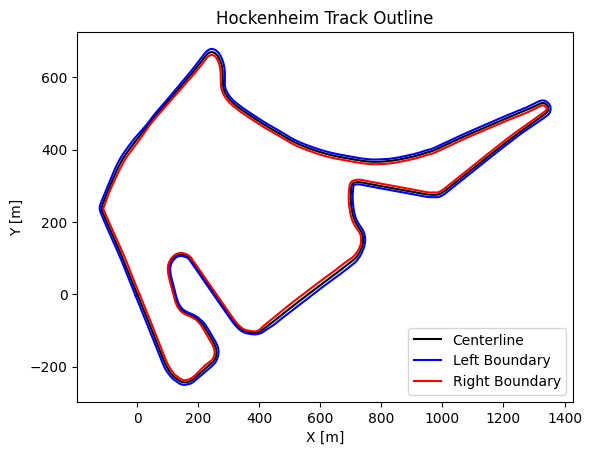

In [9]:


# Load the CSV data
track_data_url = "https://raw.githubusercontent.com/TUMFTM/racetrack-database/master/tracks/Hockenheim.csv"
df = pd.read_csv(track_data_url)

# Load the ideal racing line data
raceline_url = 'https://github.com/TUMFTM/racetrack-database/raw/e59595d1f3573b30d1ded6a08984935b957688e0/racelines/Hockenheim.csv'
raceline_data = pd.read_csv(raceline_url, comment='#', header=None)  # Load the raceline data

print(raceline_data.columns)

# Extract the centerline and track width data
x = df['# x_m'].values  # Adjust based on the actual column name
y = df['y_m'].values    # Adjust based on the actual column name
track_width_right = df['w_tr_right_m'].values
track_width_left = df['w_tr_left_m'].values

#print(track_width_right[1])

# Calculate the direction vectors (tangent vectors) between consecutive points
dx = np.diff(x)
dy = np.diff(y)

# Calculate the magnitude of the tangent vectors
tangent_norm = np.sqrt(dx**2 + dy**2)

# Normalize the tangent vectors to get unit vectors
tangent_x = dx / tangent_norm
tangent_y = dy / tangent_norm

# Calculate the normal vectors (perpendicular to tangent)
normal_x = -tangent_y
normal_y = tangent_x

# Calculate the left and right boundaries by offsetting along the normal vectors
x_left = x[:-1] + normal_x * track_width_left[:-1]
y_left = y[:-1] + normal_y * track_width_left[:-1]
x_right = x[:-1] - normal_x * track_width_right[:-1]
y_right = y[:-1] - normal_y * track_width_right[:-1]

# Ensure the right boundary is closed
x_right = np.append(x_right, x_right[0])
y_right = np.append(y_right, y_right[0])

# Ensure the left boundary is closed
x_left = np.append(x_left, x_left[0])
y_left = np.append(y_left, y_left[0])



# Plot the track
plt.plot(x, y, label='Centerline', color='black')
plt.plot(x_left, y_left, label='Left Boundary', color='blue')
plt.plot(x_right, y_right, label='Right Boundary', color='red')

plt.title("Hockenheim Track Outline")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.legend()
plt.show()

In [4]:
import plotly.graph_objects as go

# Create an interactive Plotly scatter plot for the car's GPS location during the fastest lap
fig = go.Figure()

# Figure out the offset. Could be automated by optimizing it in a way that the most points (of all rounds) are within the boundaries
offset_x = 71
offset_y = 198
# Add the telemetry data as a line plot
fig.add_trace(go.Scatter(x=x_coords, y=y_coords, mode='lines',name=' data f=100'))
fig.add_trace(go.Scatter(x=x_coords_original, y=y_coords_original, mode='markers',name='original data'))
fig.add_trace(go.Scatter(x=x_left-offset_x, y=y_left-offset_y, mode='lines',name='right boundary'))
fig.add_trace(go.Scatter(x=x_right-offset_x, y=y_right-offset_y, mode='lines',name='left boundary'))
fig.add_trace(go.Scatter(x=raceline_data[0]-offset_x, y=raceline_data[1]-offset_y, mode='lines',name='Ideal racing line'))

# Customize layout
fig.update_layout(
    title="Track Boundaries and Ideal Racing Line",
    xaxis_title="X (meters)",
    yaxis_title="Y (meters)",
    xaxis_range=[min(x_coords), max(x_coords)],
    yaxis_range=[min(y_coords), max(y_coords)],
    width=800,  # Plot size in pixels
    height=800
)

# Display the interactive plot
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [5]:
print(x_left.size)

914


In [10]:
# Filter all points that are not within the boundaries of the polygon



# Shift the boundary coordinates using the offsets
x_left_shifted = x_left - offset_x
y_left_shifted = y_left - offset_y
x_right_shifted = x_right - offset_x
y_right_shifted = y_right - offset_y

# Combine x and y coordinates into polygon points for left and right boundaries
right_boundary_points = np.column_stack((x_right_shifted, y_right_shifted))
left_boundary_points = np.column_stack((x_left_shifted, y_left_shifted))

# Combine x and y coordinates into polygon points for left and right boundaries
right_boundary_points = np.column_stack((x_right_shifted, y_right_shifted))
left_boundary_points = np.column_stack((x_left_shifted, y_left_shifted))

# Create Path objects representing the right and left boundary polygons
right_boundary_path = Path(right_boundary_points)
left_boundary_path = Path(left_boundary_points)

# Arrays to store valid points
valid_x_original = []
valid_y_original = []

# Iterate over each point in x_coords_original and y_coords_original
for x, y in zip(x_coords_original, y_coords_original):
    point = (x, y)

    # Check if the point is inside the right boundary polygon
    if left_boundary_path.contains_point(point):
        # Check if the point is outside the left boundary polygon
        if not right_boundary_path.contains_point(point):
            # If it's inside the right boundary and outside the left boundary, it's valid
            valid_x_original.append(x)
            valid_y_original.append(y)

# Arrays to store valid points
valid_x = []
valid_y = []

# Iterate over each point in x_coords_original and y_coords_original
for x, y in zip(x_coords_original, y_coords_original):
    point = (x, y)

    # Check if the point is inside the right boundary polygon
    if left_boundary_path.contains_point(point):
        # Check if the point is outside the left boundary polygon
        if not right_boundary_path.contains_point(point):
            # If it's inside the right boundary and outside the left boundary, it's valid
            valid_x.append(x)
            valid_y.append(y)

# Create an interactive Plotly scatter plot for the car's GPS location during the fastest lap
fig = go.Figure()

# Add the telemetry data as a line plot
fig.add_trace(go.Scatter(x=valid_x_original, y=valid_y_original, mode='markers',name='original data'))
fig.add_trace(go.Scatter(x=valid_x, y=valid_y, mode='lines',name=' data f=100'))
fig.add_trace(go.Scatter(x=x_left_shifted, y=y_left_shifted, mode='lines',name='right boundary'))
fig.add_trace(go.Scatter(x=x_right_shifted, y=y_right_shifted, mode='lines',name='left boundary'))

# Customize layout
fig.update_layout(
    title="Track Boundaries and Ideal Racing Line Filterd out the points outside the racing line",
    xaxis_title="X (meters)",
    yaxis_title="Y (meters)",
    xaxis_range=[min(x_coords_original), max(x_coords_original)],
    yaxis_range=[min(y_coords_original), max(y_coords_original)],
    width=800,  # Plot size in pixels
    height=800
)

# Display the interactive plot
fig.show()